In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd
from sklearn.decomposition import PCA
from sklearn import datasets

load iris dataset and create dataframe

In [121]:
#load wine dataset and dataframe

wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

learn dataset info

In [122]:
# Features and target variable
X = wine.data  # Features
y = wine.target  # Target variable (class labels)

# Display the feature names and target names
print("Feature Names:", wine.feature_names)
print("Target Names:", wine.target_names)

# Display the shape of the data
print("Data Shape:", X.shape)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:\n", X[:5])


Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names: ['class_0' 'class_1' 'class_2']
Data Shape: (178, 13)
First 5 rows of the dataset:
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


scale data input

In [125]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Normalization complete")

Normalization complete


In [126]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Use the optimal k-value from your tuning

# Initialize Leave-One-Out Cross-Validator
loo = LeaveOneOut()

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Perform Leave-One-Out Cross-Validation
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the k-NN model
    knn_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn_classifier.predict(X_test)

    # Append true and predicted labels
    true_labels.append(y_test[0])  # Since LOOCV, there is only one test sample
    predicted_labels.append(y_pred[0])

# Calculate accuracy
accuracy_loocv = accuracy_score(true_labels, predicted_labels)

# Calculate classification error
classification_error_loocv = 1 - accuracy_loocv

print("Leave-One-Out Cross-Validation Accuracy:", accuracy_loocv)
print("Leave-One-Out Cross-Validation Classification Error:", classification_error_loocv)


Leave-One-Out Cross-Validation Accuracy: 0.9550561797752809
Leave-One-Out Cross-Validation Classification Error: 0.0449438202247191


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Create a pipeline with a scaler and k-NN classifier
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define a range of k-values to search
param_grid = {'kneighborsclassifier__n_neighbors': range(1, 20)}

# Perform grid search with stratified 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
grid_search.fit(X, y)

# Print the best hyperparameters and corresponding accuracy
print("Best k:", grid_search.best_params_['kneighborsclassifier__n_neighbors'])
print("Best Accuracy:", grid_search.best_score_)


Best k: 6
Best Accuracy: 0.9666666666666668


apply PCA

In [ ]:
# Apply PCA
pca = PCA(n_components=3)
X = pca.fit_transform(X)
print("PCA done")

PCA done


apply SVD

In [ ]:
# Apply Truncated SVD
svd = TruncatedSVD(n_components=2)  # You can adjust the number of components based on your needs
X = svd.fit_transform(X)
print("SVD done")

SVD done


split data into train and test sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("split done")

split done


Standardize the data

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

print("Normalization complete")

Normalization complete


Create a KNN classifier

In [ ]:
# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of k
print("knn created")

knn created


In [ ]:
# Original data
# Fit the model on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred = knn_classifier.predict(X_test)
print("Done")

Done


In [ ]:
# Normalized data
# Fit the model on the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = knn_classifier.predict(X_test_scaled)
print("Done")

Done


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print("Accuracy:", accuracy)
print("Error:", error_rate)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222
Error: 0.02777777777777779

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



test various k

In [ ]:
# Experiment with different values of k (Original)
for k in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy = {accuracy:.4f}")

In [ ]:
# Experiment with different values of k (Normalized)
for k in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"k = {k}, Accuracy = {accuracy:.4f}")


confusion matrix

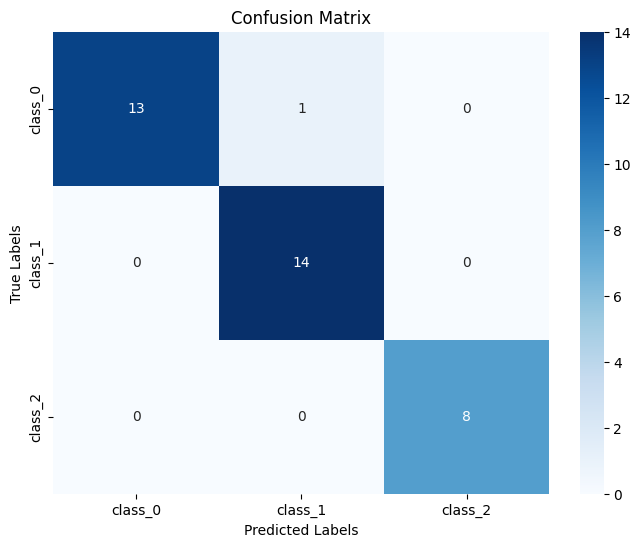

In [ ]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


f1-score, accuracy, recall, precision, support

In [ ]:
# Experiment with different values of k (Original)
accuracy_values = []
error_rate_values = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_error = 1 - accuracy  # Calculation of classification error

    accuracy_values.append(accuracy)
    error_rate_values.append(classification_error)

    report = classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)
    print("===================================================================")
    print(f"{classification_report(y_test, y_pred)}")

    print(f"k = {k}")
    print("Accuracy:", accuracy)
    print("Classification Error:", classification_error)
    print("Classification Report:")
    for class_name, metrics in report.items():
        if class_name != 'accuracy':
            print(f"\nClass {class_name}")
            print(f"Precision: {metrics['precision']:0.2f}")
            print(f"Recall: {metrics['recall']:0.2f}")
            print(f"F1-score: {metrics['f1-score']:0.2f}")
            print(f"Support: {metrics['support']}")

    print("===================================================================")


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

k = 1
Accuracy: 0.9722222222222222
Classification Error: 0.02777777777777779
Classification Report:

Class class_0
Precision: 1.00
Recall: 0.93
F1-score: 0.96
Support: 14

Class class_1
Precision: 0.93
Recall: 1.00
F1-score: 0.97
Support: 14

Class class_2
Precision: 1.00
Recall: 1.00
F1-score: 1.00
Support: 8

Class macro avg
Precision: 0.98
Recall: 0.98
F1-score: 0.98
Support: 36

Class weighted avg
Precision: 0.97
Recall: 0.97
F1-score: 0.97
Support: 36
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00      

In [ ]:
# Experiment with different values of k (Normalized)
accuracy_values = []
error_rate_values = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    #knn_classifier.fit(X_train, y_train)
    #y_pred = knn_classifier.predict(X_test)

    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    classification_error = 1 - accuracy  # Calculation of classification error

    accuracy_values.append(accuracy)
    error_rate_values.append(classification_error)

    report = classification_report(y_test, y_pred, target_names=wine.target_names, output_dict=True)
    print("===================================================================")
    print(f"{classification_report(y_test, y_pred)}")

    print(f"k = {k}")
    print("Accuracy:", accuracy)
    print("Classification Error:", classification_error)
    print("Classification Report:")
    for class_name, metrics in report.items():
        if class_name != 'accuracy':
            print(f"\nClass {class_name}")
            print(f"Precision: {metrics['precision']:0.2f}")
            print(f"Recall: {metrics['recall']:0.2f}")
            print(f"F1-score: {metrics['f1-score']:0.2f}")
            print(f"Support: {metrics['support']}")

    print("===================================================================")


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

k = 1
Accuracy: 0.9444444444444444
Classification Error: 0.05555555555555558
Classification Report:

Class class_0
Precision: 0.93
Recall: 1.00
F1-score: 0.97
Support: 14

Class class_1
Precision: 1.00
Recall: 0.86
F1-score: 0.92
Support: 14

Class class_2
Precision: 0.89
Recall: 1.00
F1-score: 0.94
Support: 8

Class macro avg
Precision: 0.94
Recall: 0.95
F1-score: 0.94
Support: 36

Class weighted avg
Precision: 0.95
Recall: 0.94
F1-score: 0.94
Support: 36
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92      

plotting accuracy table

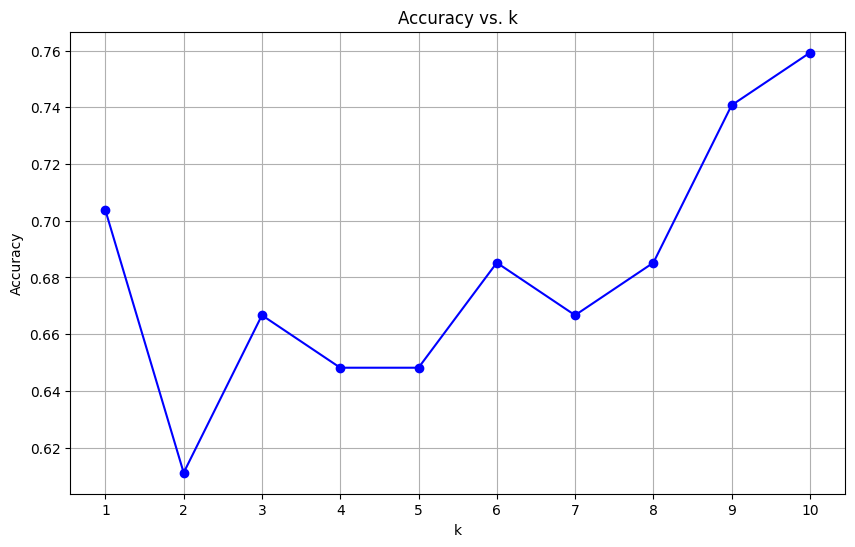

In [ ]:
# Line plot for accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))  # Customize x-axis ticks
plt.grid(True)
plt.show()

plotting error rate table

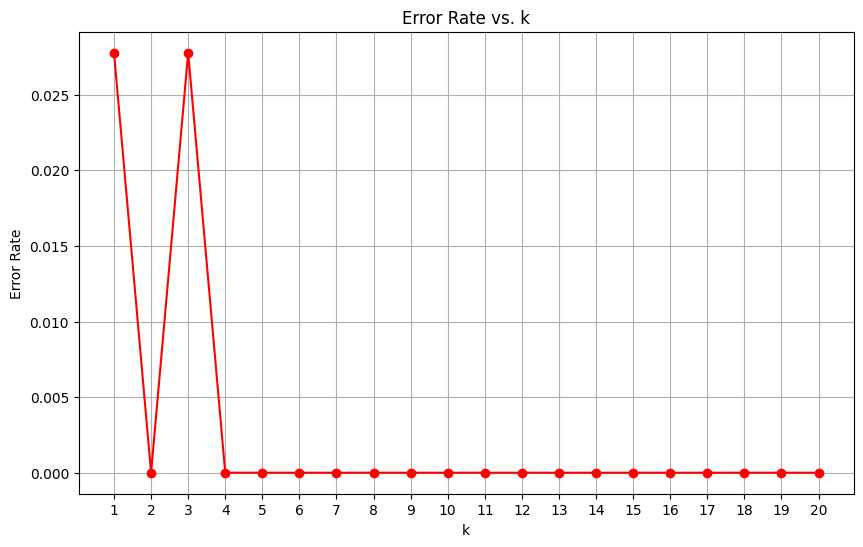

In [ ]:
# Line plot for error rate
error_rate_values = [1 - acc for acc in accuracy_values]  # Calculate error rate from accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate_values, marker='o', linestyle='-', color='r')
plt.title('Error Rate vs. k')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))  # Customize x-axis ticks
plt.grid(True)
plt.show()